<a href="https://colab.research.google.com/github/amscally-dsci/DDDS-My-Project/blob/main/Project-2/Project_2_Predicting_Housing_Prices_Using_Model_Validation_of_Continuous_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Housing Prices Using Model Validation of Continuous Response

# Problem Definition

Data set pulled from the Ames, Iowa county's assessor office providing 80+ variables associated with the housing market and used in determining property assessment values. Timeframe is 2006 to 2010.

**Business** **Problem**

 What factors contribute to creating a buyer's market and when is the next one most likely to occur?

 Goal: Money; building intergenerational wealth; forecasting future business opportunity

**Data Science Problem**

Predicting housing sale prices by using regression modeling techniques, including linear regression, cross validation, regularization, and logistic regression.

Goal: minimize RMSE percentage error on the predicted housing sale price.

**Data Problem Type and Model**

Data label? Yes

What is the label? (Output) SalePrice (for housing)

Output/Target is continuous, numerical

Data Model: Supervised, Regression



## Data Collection/Sources

## Import Libraries & Read in Data

In [296]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math
from sklearn.preprocessing import StandardScaler

### File Paths

Data source hosted on AWS S3

A data dictionary file is available at AWS S3 at [Housing Data Dictionary]( https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf ).

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv .


In [226]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv "
housing= pd.read_csv(url)
housing.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


### Data Overview

**The original housing data set's dimensions**

-Total Rows 2,637

-Total Columns 81

-Total elements 213,957


**The original housing data set's characteristics**

-data types

float64 11, int64 27, object 43

-Total nulls in data set 14,208

-memory usage: 1.6+ MB


In [227]:
housing.shape

(2637, 81)

In [228]:
housing.size

213597

In [229]:
housing.dtypes

,0
PID,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
...,...
Mo Sold,int64
Yr Sold,int64
Sale Type,object
Sale Condition,object


In [230]:
# dtypes and their counts
housing.dtypes.value_counts()

,count
object,43
int64,27
float64,11


In [231]:
housing.nunique().sort_values(ascending = False)

,0
PID,2637
Lot Area,1799
Gr Liv Area,1216
Bsmt Unf SF,1080
1st Flr SF,1022
...,...
Bsmt Half Bath,3
Paved Drive,3
Street,2
Alley,2


## Data Cleaning

The original housing data set has 2,637 rows and 81 columns. This is different from the original housing data set's dictionary which cites 2,930 rows and 82 variables (columns). If the housing dictionary is true, which we should assume it to be since there is no data science standard for reading a csv file,then we must reconcile the 293 row discrepancy and one column variance.

Class commentary that influenced my approach to examining this data set first and foremost:


* MSSubclass is an integer type in the data set. In the housing dictionary, it is labeled as nominal
* Every program that is reading in a csv file is making a guess. There is no standard. Of these 80 columns how many other data are read wrong.
* Do I have a data dictionary? when I see integer in the data set, does it match the dictionary notation/observation.


Methodology & Approach

*   First explored the Data Dictionary and its relationship to the data set focusing on object data type.

* For a quick baseline to start, I chose to focus on the 11 float predictors. They met the conditions of continuous, numerical, and no or few nulls.

* Metadata filter process (should have started with this!)

Let's use info to further explore what data types we are dealing with and what values are currently assigned to them.

In [232]:
# Check to see if there are any NA values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [233]:
# Count total Nans in data frame
housing.isna().sum().sum()

np.int64(14208)

In [234]:
# find nulls, list columns with nulls, sort from lowest to highest count of nulls
non=housing.isnull().sum().sort_values(ascending = False)
non [non>0]

,0
Pool QC,2626
Misc Feature,2541
Alley,2457
Fence,2109
Mas Vnr Type,1607
Fireplace Qu,1284
Lot Frontage,449
Garage Yr Blt,147
Garage Cond,147
Garage Qual,147


In [235]:
# Calculate the sum of null values for each column in the DataFrame
null_counts = housing.isnull().sum()

# Filter the results to include only columns where the null count is greater than 0
columns_with_nulls = null_counts[null_counts > 0]

# Calculate the total null count from the filtered columns
total_null_count_after_filter = columns_with_nulls.sum()

print("Columns with Null Values and their Counts (after filter):")
print(columns_with_nulls)
print(f"\nTotal Null Count from columns with nulls: {total_null_count_after_filter}")

Columns with Null Values and their Counts (after filter):
Lot Frontage       449
Alley             2457
Mas Vnr Type      1607
Mas Vnr Area        23
Bsmt Qual           73
Bsmt Cond           73
Bsmt Exposure       76
BsmtFin Type 1      73
BsmtFin SF 1         1
BsmtFin Type 2      74
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1284
Garage Type        145
Garage Yr Blt      147
Garage Finish      147
Garage Cars          1
Garage Area          1
Garage Qual        147
Garage Cond        147
Pool QC           2626
Fence             2109
Misc Feature      2541
dtype: int64

Total Null Count from columns with nulls: 14208


In [236]:
# Make copies of original data frame
df_backup=housing.copy()
df_backup

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


In [237]:
# Look at the data frame by dtypes, float first
float_cols=housing.select_dtypes(include=['float64'])
float_cols

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,62.0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,440.0
1,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,516.0
2,50.0,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,544.0
3,68.0,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,592.0
4,60.0,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,576.0
...,...,...,...,...,...,...,...,...,...,...,...
2632,52.0,0.0,0.0,0.0,816.0,816.0,0.0,0.0,1985.0,2.0,528.0
2633,74.0,0.0,460.0,286.0,308.0,1054.0,1.0,0.0,1990.0,2.0,462.0
2634,61.0,0.0,960.0,0.0,266.0,1226.0,1.0,0.0,1981.0,2.0,484.0
2635,78.0,174.0,0.0,0.0,1064.0,1064.0,0.0,0.0,1974.0,2.0,478.0


In [238]:
sale_price_series=housing['SalePrice']
sale_price_series

,SalePrice
0,115400
1,90000
2,141000
3,254000
4,155000
...,...
2632,114500
2633,162000
2634,211500
2635,165000


In [239]:
concatenated_df = pd.concat([float_cols, sale_price_series], axis=1)
concatenated_df

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
0,62.0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,440.0,115400
1,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,516.0,90000
2,50.0,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,544.0,141000
3,68.0,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,592.0,254000
4,60.0,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,576.0,155000
...,...,...,...,...,...,...,...,...,...,...,...,...
2632,52.0,0.0,0.0,0.0,816.0,816.0,0.0,0.0,1985.0,2.0,528.0,114500
2633,74.0,0.0,460.0,286.0,308.0,1054.0,1.0,0.0,1990.0,2.0,462.0,162000
2634,61.0,0.0,960.0,0.0,266.0,1226.0,1.0,0.0,1981.0,2.0,484.0,211500
2635,78.0,174.0,0.0,0.0,1064.0,1064.0,0.0,0.0,1974.0,2.0,478.0,165000


In [240]:
concatenated_df.size

31644

In [241]:
concatenated_df.shape[0]

2637

In [242]:
concatenated_df.shape[1]

12

In [243]:
# Count total Nans in data frame
concatenated_df.isna().sum().sum()

np.int64(629)

In [244]:
non=concatenated_df.isnull().sum().sort_values(ascending=False)
non [non>0]

,0
Lot Frontage,449
Garage Yr Blt,147
Mas Vnr Area,23
Bsmt Half Bath,2
Bsmt Full Bath,2
BsmtFin SF 1,1
BsmtFin SF 2,1
Total Bsmt SF,1
Bsmt Unf SF,1
Garage Cars,1


In [245]:
# Exploratory data anayslis for float_cols features with nulls or missing data
concatenated_df.columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice'],
      dtype='object')

In [246]:
Index='col'


In [247]:

for col in concatenated_df:
    print(f"Column: '{col}'")
    print(f"Number of unique values: {housing[col].nunique()}")
    print("Value Counts:")
    print(housing[col].value_counts(dropna=False)) # Include NaN counts
    print(f"Missing Values: {housing[col].isnull().sum()} out of {len(housing[col])} ({housing[col].isnull().sum()/len(housing[col])*100:.2f}%)\n")
    print("-" * 50)

Column: 'Lot Frontage'
Number of unique values: 126
Value Counts:
Lot Frontage
NaN      449
60.0     247
80.0     124
70.0     123
50.0     104
        ... 
150.0      1
140.0      1
200.0      1
25.0       1
195.0      1
Name: count, Length: 127, dtype: int64
Missing Values: 449 out of 2637 (17.03%)

--------------------------------------------------
Column: 'Mas Vnr Area'
Number of unique values: 425
Value Counts:
Mas Vnr Area
0.0      1580
NaN        23
176.0      13
200.0      12
216.0      12
         ... 
664.0       1
468.0       1
902.0       1
251.0       1
532.0       1
Name: count, Length: 426, dtype: int64
Missing Values: 23 out of 2637 (0.87%)

--------------------------------------------------
Column: 'BsmtFin SF 1'
Number of unique values: 935
Value Counts:
BsmtFin SF 1
0.0       840
24.0       23
16.0       12
300.0       8
936.0       7
         ... 
434.0       1
573.0       1
382.0       1
702.0       1
1571.0      1
Name: count, Length: 936, dtype: int64
Missing Val

To establish a baseline, I will drop all nulls without regard to imputing missing values. At a later iteration, Lot Frontage and Garage Yr Built could have their values transformed and imputed.

In [248]:
#make copies of concatenated df before drop
backup_concatdf=concatenated_df.copy()

backup_concatdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2188 non-null   float64
 1   Mas Vnr Area    2614 non-null   float64
 2   BsmtFin SF 1    2636 non-null   float64
 3   BsmtFin SF 2    2636 non-null   float64
 4   Bsmt Unf SF     2636 non-null   float64
 5   Total Bsmt SF   2636 non-null   float64
 6   Bsmt Full Bath  2635 non-null   float64
 7   Bsmt Half Bath  2635 non-null   float64
 8   Garage Yr Blt   2490 non-null   float64
 9   Garage Cars     2636 non-null   float64
 10  Garage Area     2636 non-null   float64
 11  SalePrice       2637 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 247.3 KB


In [249]:
# Alternative, safer workflow:
# 1. Drop rows and assign the result to a new DataFrame
# The original concatenated_df remains unchanged.
cleaned_df = concatenated_df.dropna(axis=0)
cleaned_df.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
0,62.0,0.0,513.0,144.0,348.0,1005.0,1.0,0.0,1964.0,2.0,440.0,115400
1,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,2.0,516.0,90000
2,50.0,0.0,0.0,0.0,780.0,780.0,0.0,0.0,1979.0,1.0,544.0,141000
3,68.0,0.0,484.0,0.0,491.0,975.0,1.0,0.0,2000.0,2.0,592.0,254000
4,60.0,0.0,350.0,210.0,0.0,560.0,1.0,0.0,1971.0,2.0,576.0,155000


In [250]:
# Count total Nans after dropna executed
cleaned_df.isna().sum().sum()

np.int64(0)

In [251]:
summary_stats=cleaned_df.describe().transpose()
summary_stats

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2033.0,69.611904,23.403185,21.0,59.0,69.0,80.0,313.0
Mas Vnr Area,2033.0,104.950812,183.982305,0.0,0.0,0.0,169.0,1600.0
BsmtFin SF 1,2033.0,435.367437,459.471209,0.0,0.0,358.0,724.0,5644.0
BsmtFin SF 2,2033.0,50.030005,168.679195,0.0,0.0,0.0,0.0,1474.0
Bsmt Unf SF,2033.0,575.289228,443.413756,0.0,231.0,483.0,815.0,2336.0
Total Bsmt SF,2033.0,1060.686670,436.855698,0.0,792.0,991.0,1313.0,6110.0
Bsmt Full Bath,2033.0,0.424004,0.516704,0.0,0.0,0.0,1.0,2.0
Bsmt Half Bath,2033.0,0.057550,0.237136,0.0,0.0,0.0,0.0,2.0
Garage Yr Blt,2033.0,1977.728480,26.093979,1895.0,1959.0,1979.0,2003.0,2010.0
Garage Cars,2033.0,1.857354,0.667228,1.0,1.0,2.0,2.0,5.0


In [252]:
summary_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Lot Frontage to SalePrice
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   12 non-null     float64
 1   mean    12 non-null     float64
 2   std     12 non-null     float64
 3   min     12 non-null     float64
 4   25%     12 non-null     float64
 5   50%     12 non-null     float64
 6   75%     12 non-null     float64
 7   max     12 non-null     float64
dtypes: float64(8)
memory usage: 1.1+ KB


In [253]:
summary_stats.size

96

In [254]:
# The 'include='all'' argument goes inside the describe() method.
# .transpose() is chained at the end. Using .T is a common shortcut.

summary_stats_all=cleaned_df.describe(include='all').transpose()
summary_stats_all

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2033.0,69.611904,23.403185,21.0,59.0,69.0,80.0,313.0
Mas Vnr Area,2033.0,104.950812,183.982305,0.0,0.0,0.0,169.0,1600.0
BsmtFin SF 1,2033.0,435.367437,459.471209,0.0,0.0,358.0,724.0,5644.0
BsmtFin SF 2,2033.0,50.030005,168.679195,0.0,0.0,0.0,0.0,1474.0
Bsmt Unf SF,2033.0,575.289228,443.413756,0.0,231.0,483.0,815.0,2336.0
Total Bsmt SF,2033.0,1060.686670,436.855698,0.0,792.0,991.0,1313.0,6110.0
Bsmt Full Bath,2033.0,0.424004,0.516704,0.0,0.0,0.0,1.0,2.0
Bsmt Half Bath,2033.0,0.057550,0.237136,0.0,0.0,0.0,0.0,2.0
Garage Yr Blt,2033.0,1977.728480,26.093979,1895.0,1959.0,1979.0,2003.0,2010.0
Garage Cars,2033.0,1.857354,0.667228,1.0,1.0,2.0,2.0,5.0


In [255]:
cleaned_df.size

24396

In [256]:
cleaned_df.shape[0]

2033

In [257]:
cleaned_df.shape[1]

12

## EDA

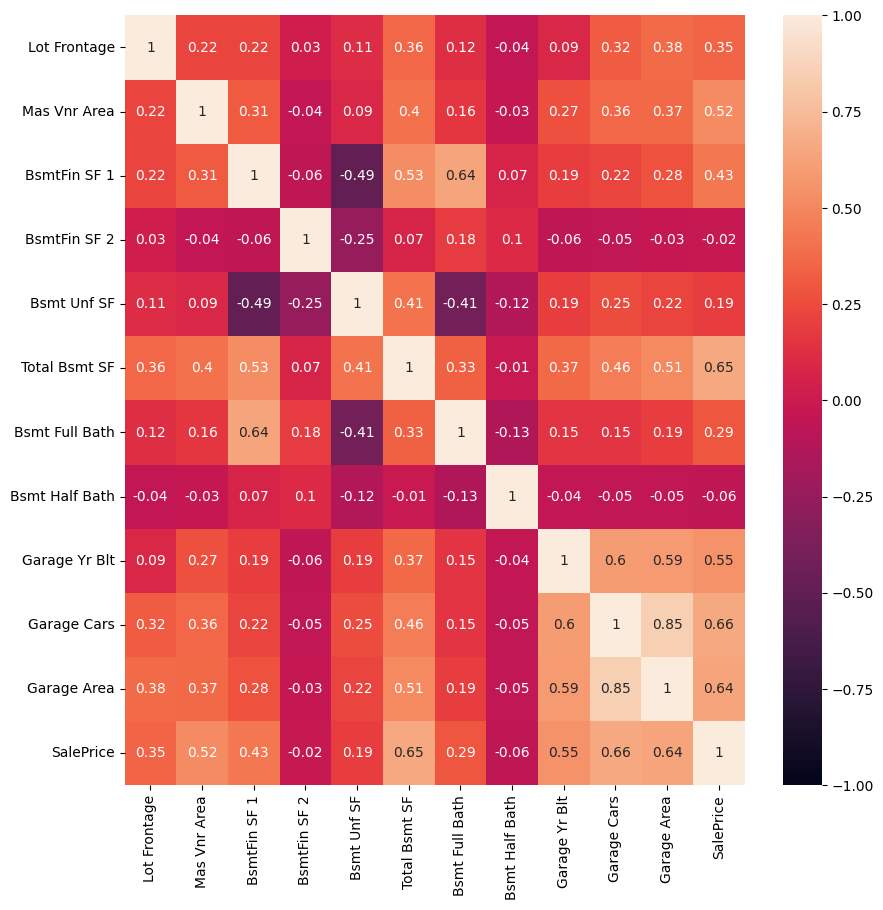

In [258]:
# Let's take a look at a correlation plot
plt.figure(figsize=(10,10))
correlation_matrix = cleaned_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, vmin=-1, vmax=1) ;

In [259]:
corrs = cleaned_df.corr().round(2).unstack().abs()
corrs = corrs[(corrs < 1) & (corrs > 0.10)]
corrs.sort_values(ascending = False)[::2]

Garage Cars     Garage Area       0.85
SalePrice       Garage Cars       0.66
                Total Bsmt SF     0.65
Bsmt Full Bath  BsmtFin SF 1      0.64
BsmtFin SF 1    Bsmt Full Bath    0.64
Garage Yr Blt   Garage Cars       0.60
                Garage Area       0.59
SalePrice       Garage Yr Blt     0.55
Total Bsmt SF   BsmtFin SF 1      0.53
Mas Vnr Area    SalePrice         0.52
Garage Area     Total Bsmt SF     0.51
Bsmt Unf SF     BsmtFin SF 1      0.49
Garage Cars     Total Bsmt SF     0.46
SalePrice       BsmtFin SF 1      0.43
Bsmt Unf SF     Total Bsmt SF     0.41
Bsmt Full Bath  Bsmt Unf SF       0.41
Total Bsmt SF   Mas Vnr Area      0.40
Lot Frontage    Garage Area       0.38
Garage Yr Blt   Total Bsmt SF     0.37
Total Bsmt SF   Garage Yr Blt     0.37
Garage Cars     Mas Vnr Area      0.36
Lot Frontage    Total Bsmt SF     0.36
                SalePrice         0.35
Bsmt Full Bath  Total Bsmt SF     0.33
Garage Cars     Lot Frontage      0.32
Mas Vnr Area    BsmtFin SF 1      0.31
SalePrice       Bsmt Full Bath    0.29
BsmtFin SF 1    Garage Area       0.28
Garage Yr Blt   Mas Vnr Area      0.27
BsmtFin SF 2    Bsmt Unf SF       0.25
Bsmt Unf SF     Garage Cars       0.25
Mas Vnr Area    Lot Frontage      0.22
Lot Frontage    Mas Vnr Area      0.22
Bsmt Unf SF     Garage Area       0.22
BsmtFin SF 1    Lot Frontage      0.22
Garage Area     Bsmt Full Bath    0.19
Garage Yr Blt   BsmtFin SF 1      0.19
SalePrice       Bsmt Unf SF       0.19
Bsmt Unf SF     SalePrice         0.19
BsmtFin SF 2    Bsmt Full Bath    0.18
Bsmt Full Bath  Mas Vnr Area      0.16
Garage Cars     Bsmt Full Bath    0.15
Garage Yr Blt   Bsmt Full Bath    0.15
Bsmt Full Bath  Bsmt Half Bath    0.13
Lot Frontage    Bsmt Full Bath    0.12
Bsmt Unf SF     Bsmt Half Bath    0.12
                Lot Frontage      0.11
dtype: float64

### Correlation Matrix: What do we notice?


*   Many predictors are highly correlated to each other.
For example, Garage area and Garage Cars (and maybe garage year built)
*   several predictors are mid-to-highly correlated with SalePrice
* We could probably take out or combine the discrete variables that are positively correlated with square footage features like Basement Finished or Unfinished.
* Perhaps we should combine all data or omit a pair that is NOT continuous. Do both the features and the target need to be continuous ina Regression Model?



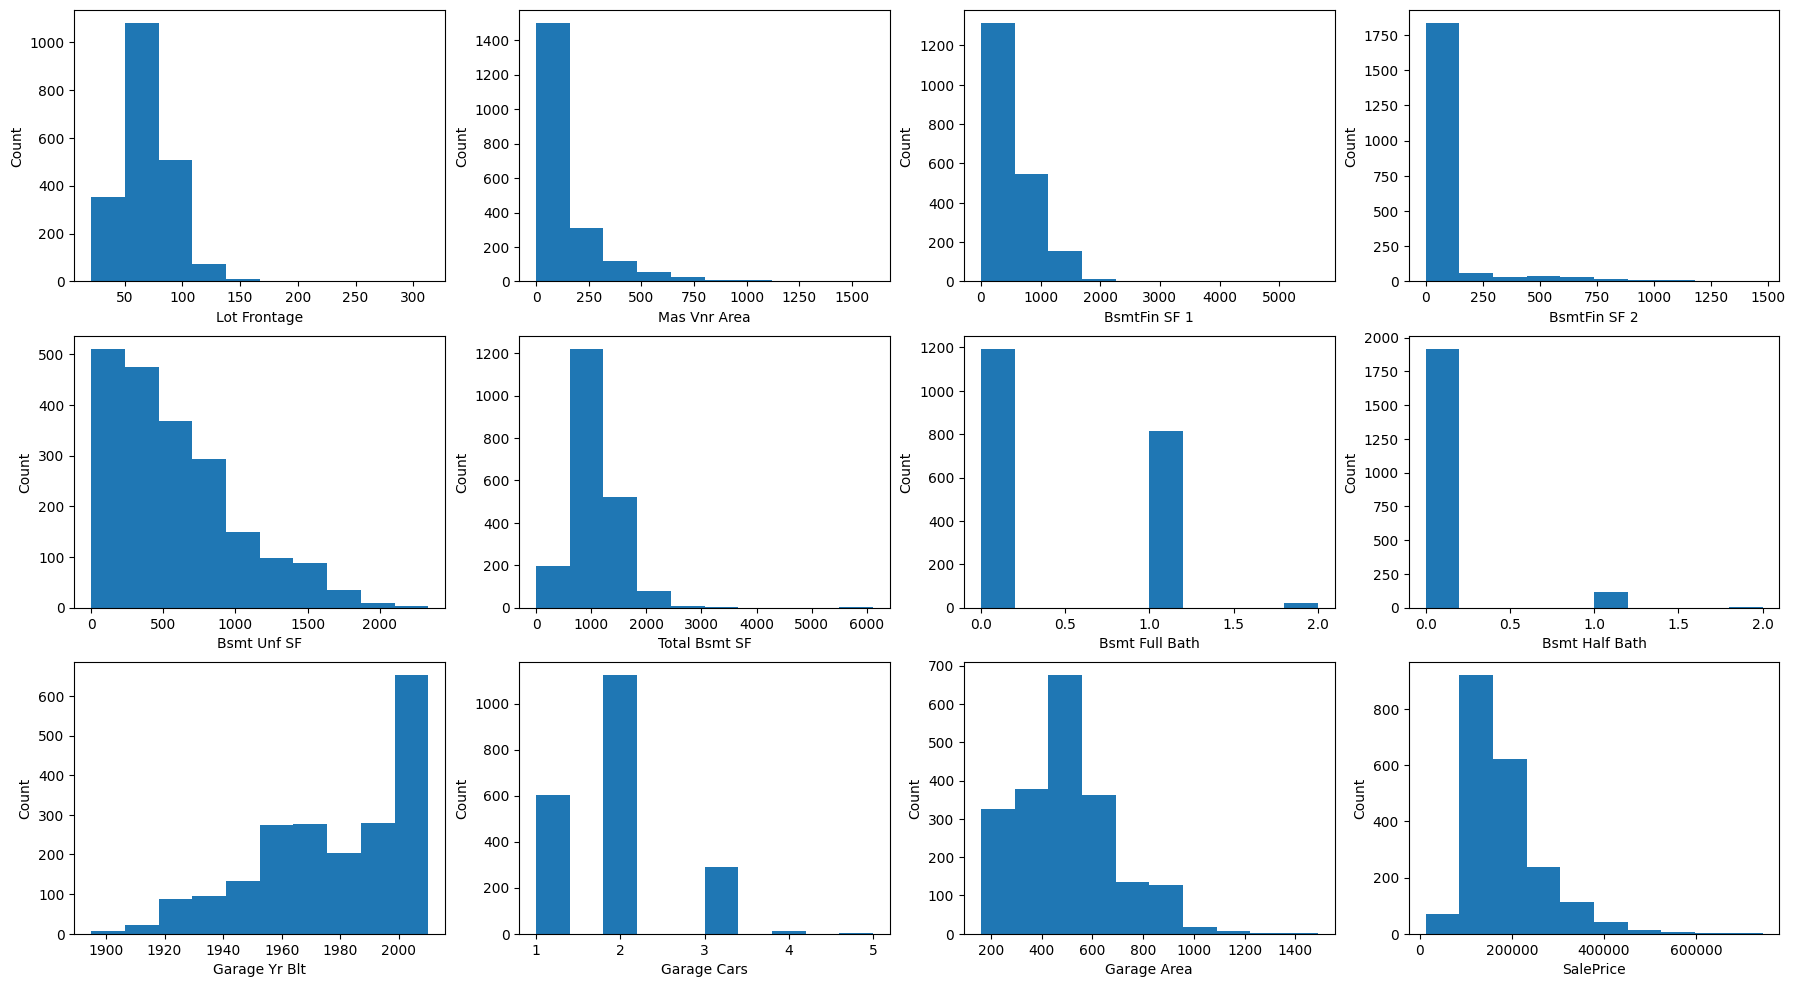

In [260]:
# Let's plot all 11 predictors and one target to see how they are distributed.
fig, axs = plt.subplots(3,4, figsize = (22,12)) # Creating 3x4 subplots because we have 12 columns in our data
column_names = cleaned_df.columns
n = 0
for i in range(3): # Loop through rows
  for j in range(4): # Loop through columns
    axs[i,j].hist(cleaned_df[column_names[n]])
    axs[i,j].set_xlabel(column_names[n])
    axs[i,j].set_ylabel('Count')
    n = n + 1

 ### Histogram: What do we notice?
- Sale Price distribution skewed
- Several predictor variables are discrete Garage Cars, basement bathroom types, etc,
- This data set may have outliers given the sudden uptick in counts for a small tranche of data on the x axis.
- garage year built may need some transformation on a year entry or count that is incorrect in the data set.
-Linear relationship-only one predictor, Lot Frontage Area, may be a good indicator of sale-price. That said, I did drop 449 nulls from that feature, so this may be a false fit.

### Distribution Visualization for Readability

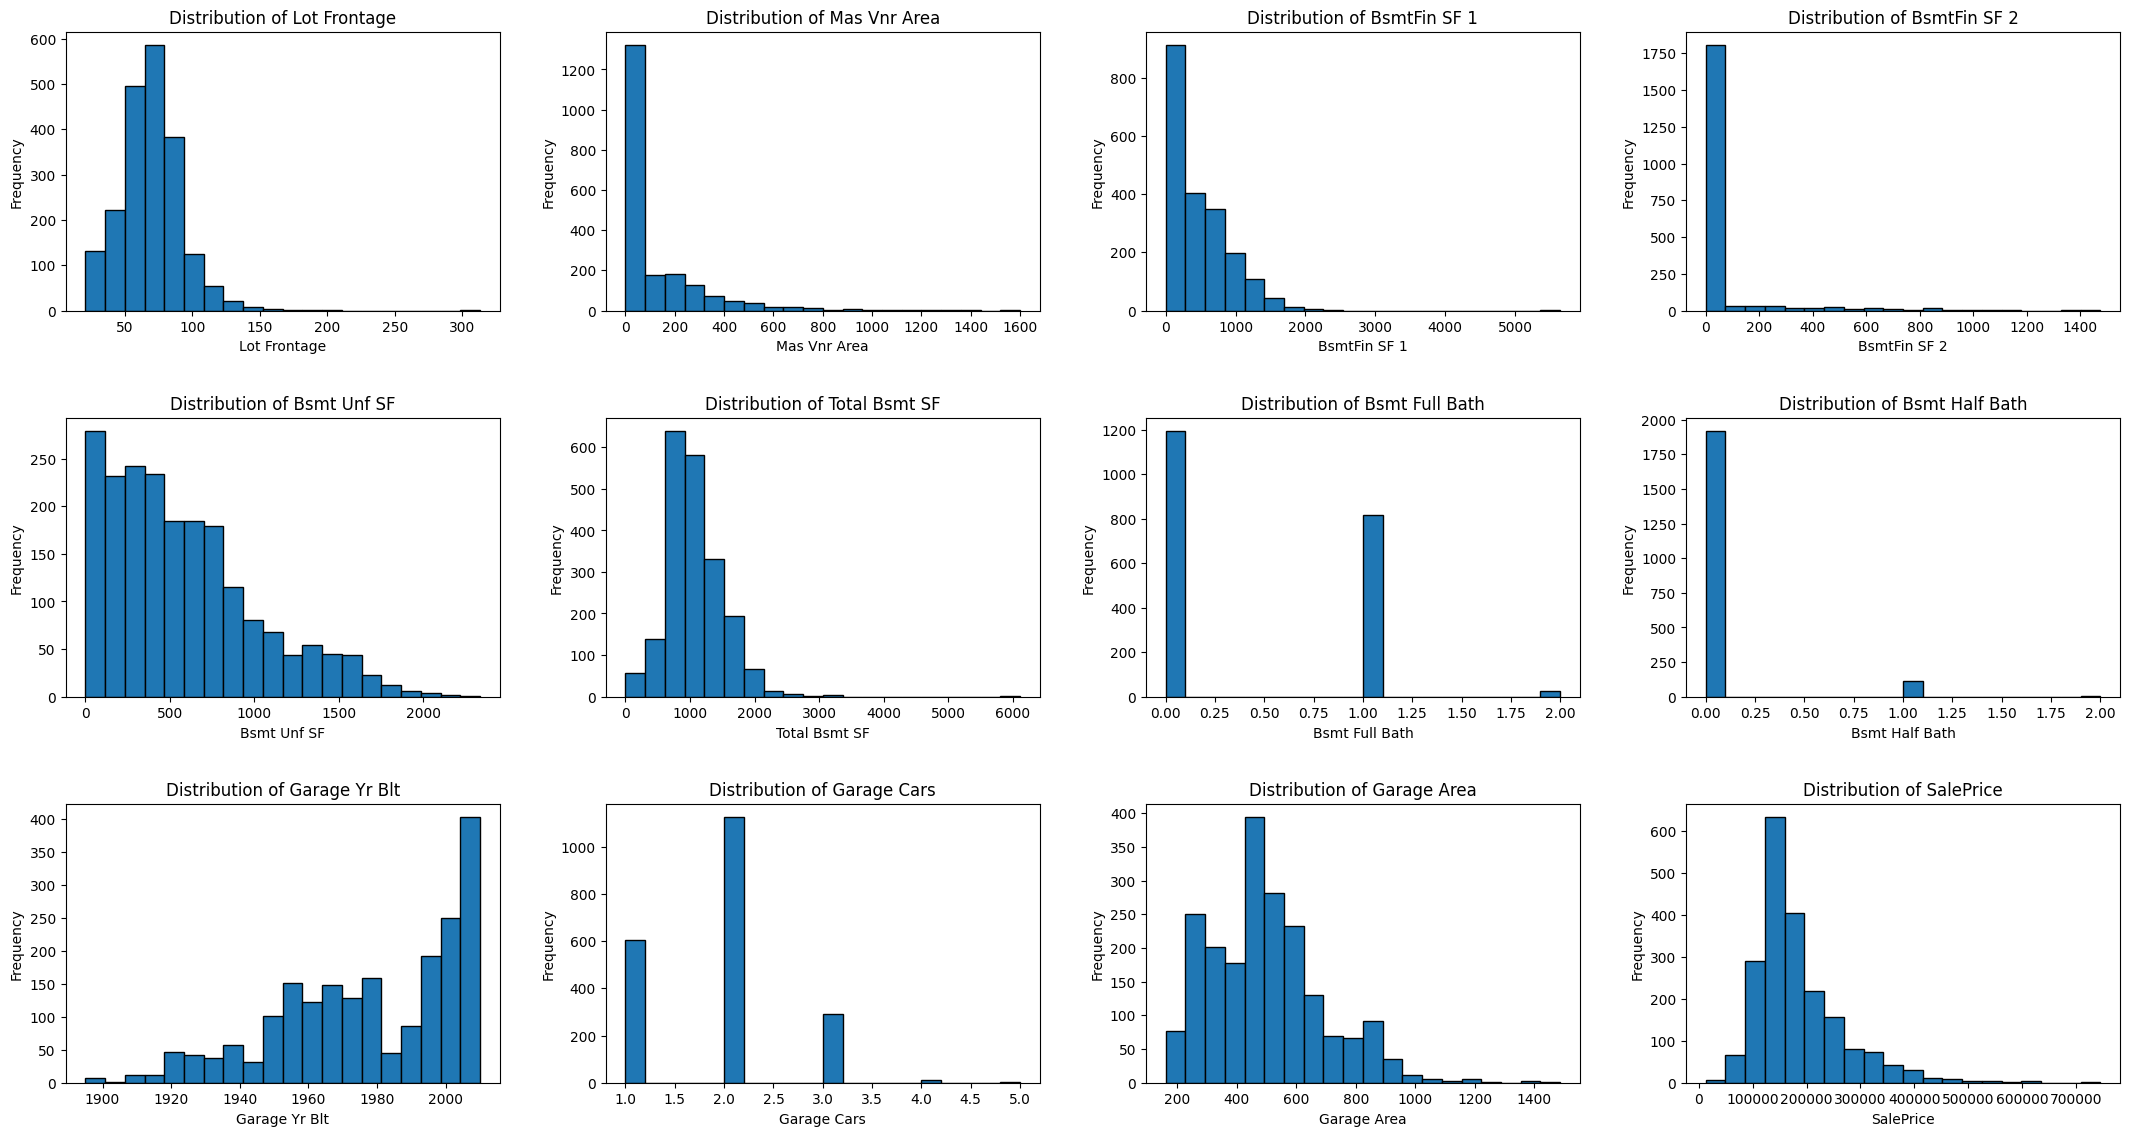

In [261]:
#Create a figure and a 3x4 grid of subplots
fig, axs = plt.subplots(3, 4, figsize=(22, 12))

# Get the list of column names
column_names = cleaned_df.columns

# Flatten the 2D array of axes to a 1D array for easy iteration.
# The original code had a typo here, using 'subplots' before it was defined.
# It should use 'axs', which was created by plt.subplots().
subplots = axs.flatten()

# Loop through each subplot axis and plot the corresponding column
for i, subplot_ax in enumerate(subplots):
    # Make sure we don't try to plot more histograms than we have columns
    if i < len(column_names):
        column_to_plot = column_names[i]

        # Plot the histogram on the current subplot axis
        subplot_ax.hist(cleaned_df[column_to_plot], bins=20, edgecolor='black')

        # Set the title and labels for clarity
        subplot_ax.set_title(f'Distribution of {column_to_plot}', fontsize=12)
        subplot_ax.set_xlabel(column_to_plot, fontsize=10)
        subplot_ax.set_ylabel('Frequency', fontsize=10)

# Adjust the layout to make sure titles and labels don't overlap
plt.tight_layout(pad=3.0)

# Show the final plot
plt.show()



### What do we notice?

- Sale Price has outliers, but is relatively well grouped amid the median at $185K
-garages had a record year in the 2010s! Nice lookback to 1895.
-Garage area and Garage cars could probably be grouped together if they are strongly correlated.However, garage car count is a selling point in most markets. Let's leave them unbundeled for now.


In [262]:
cleaned_df.size

24396

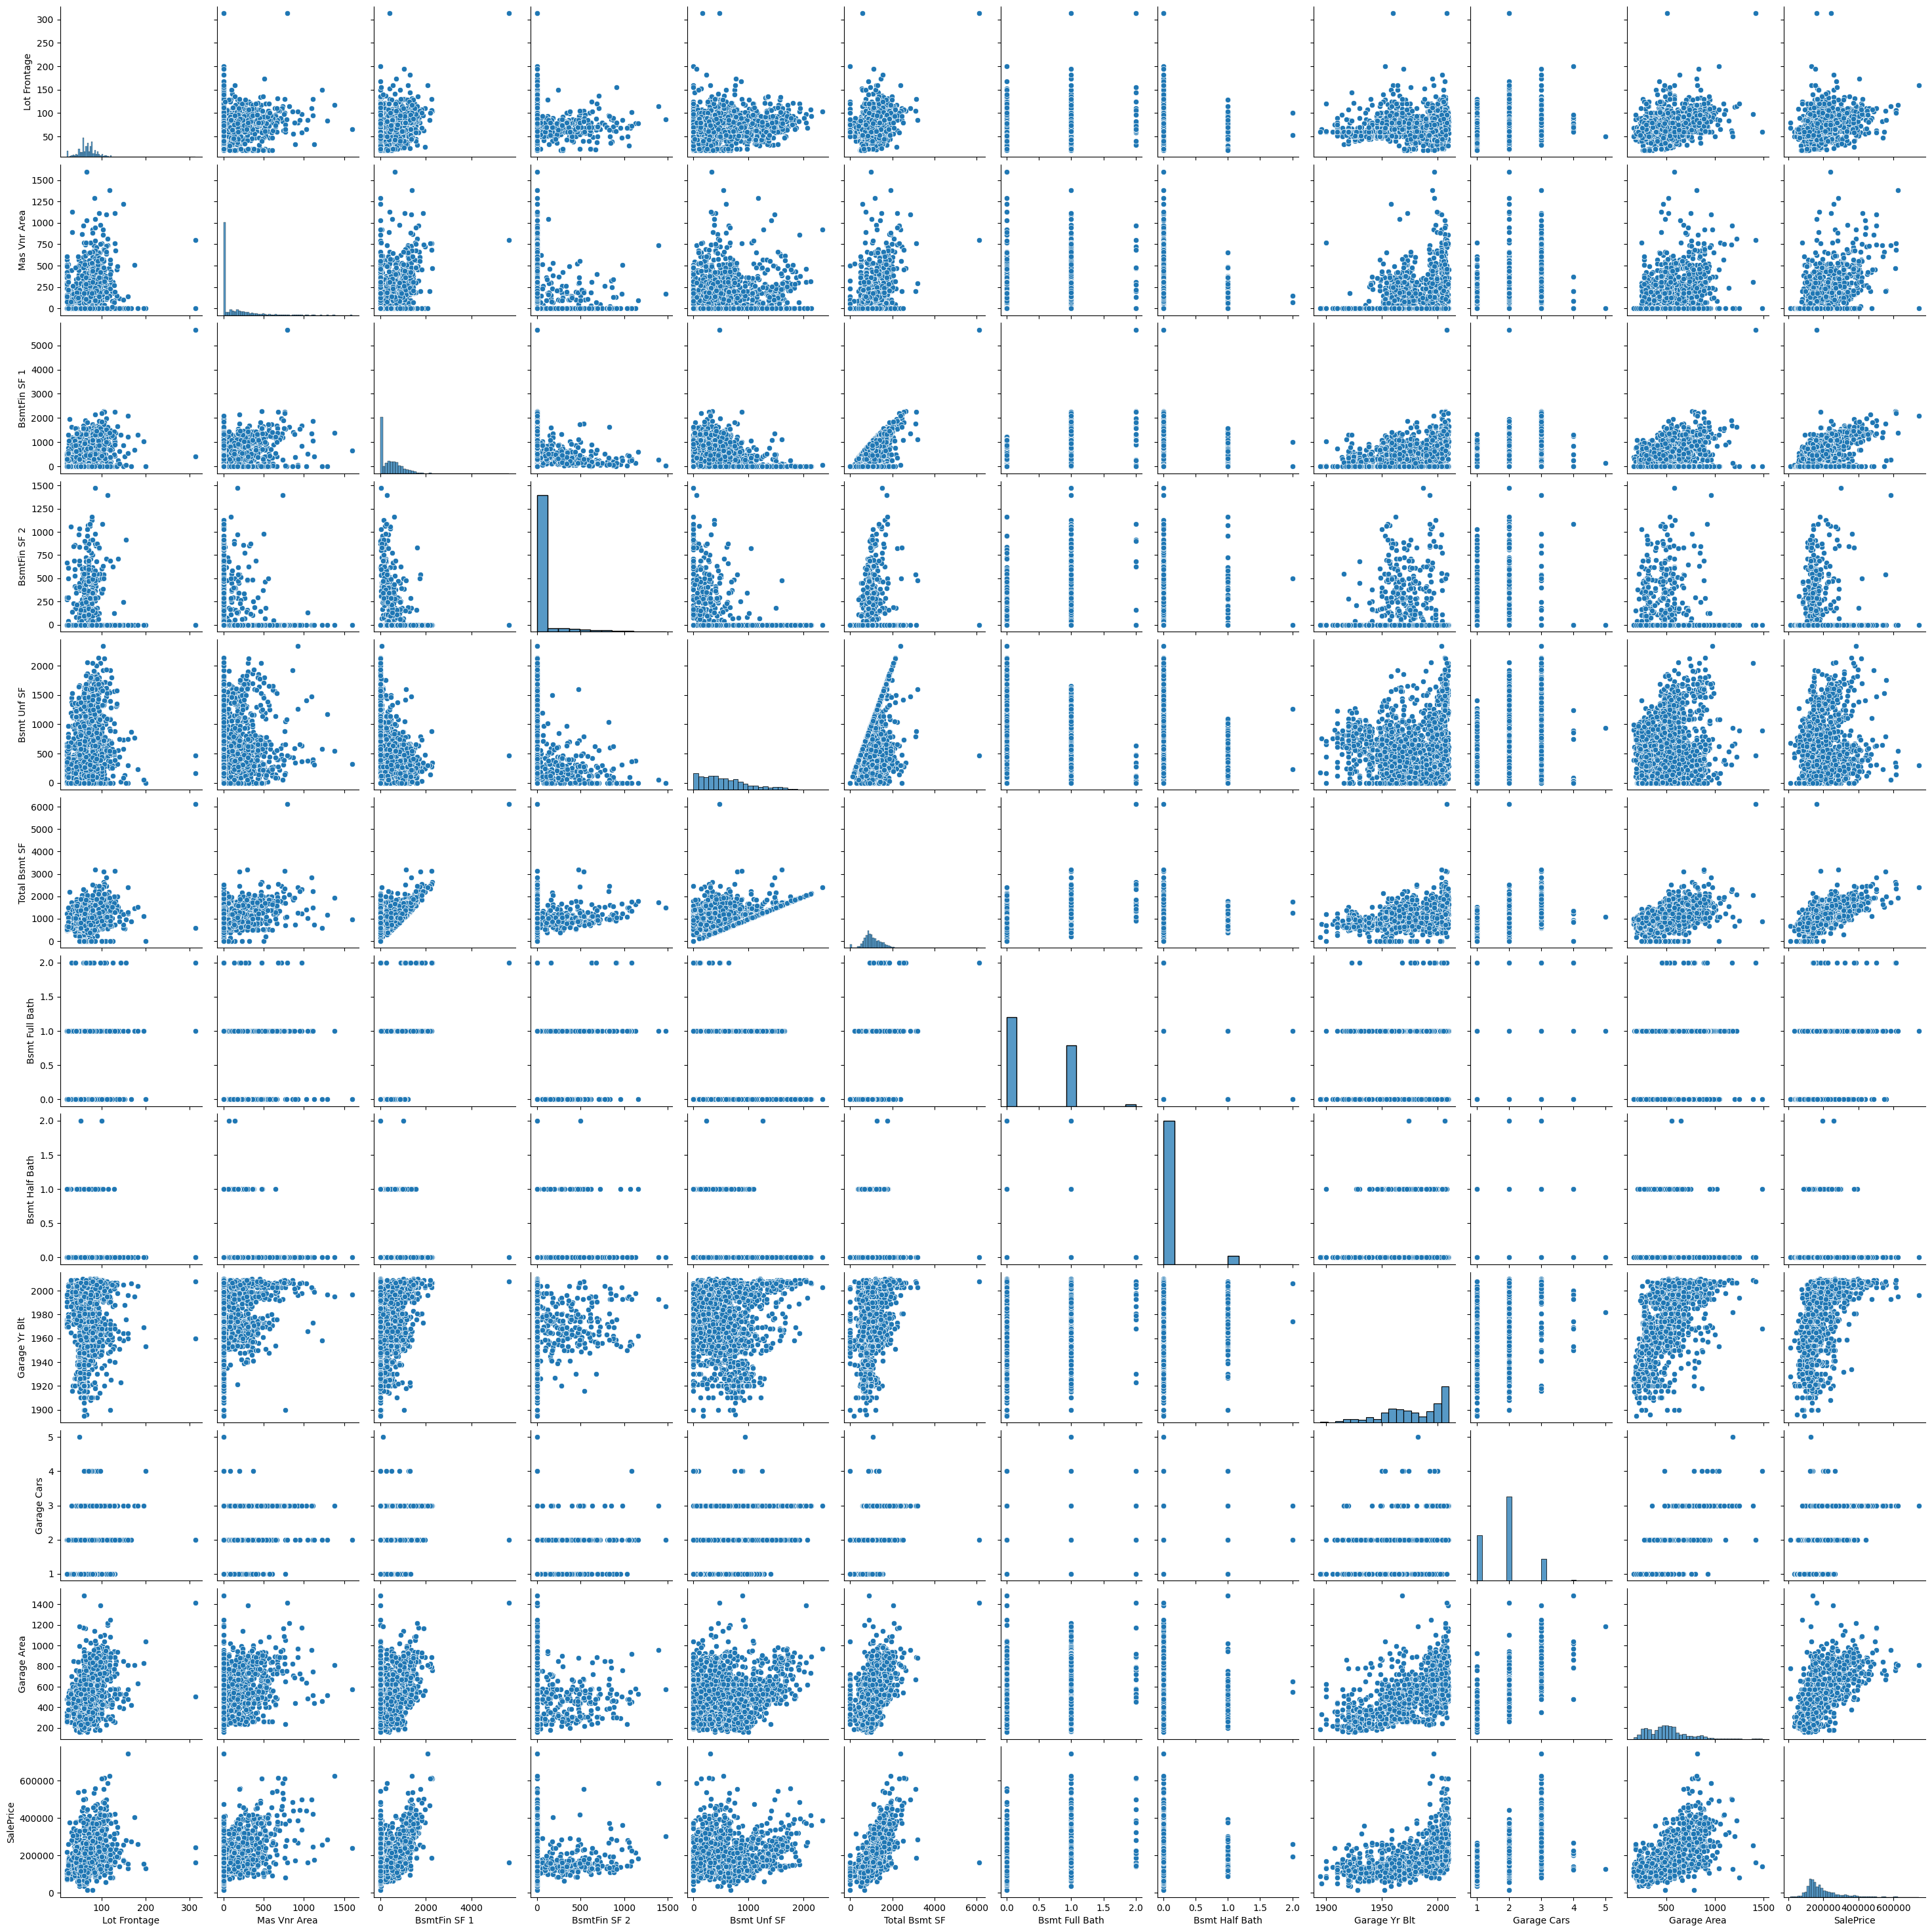

In [263]:
# Let's plot a pairplot
sns.pairplot(cleaned_df) ;

### Pairplot: What do we notice?


*   Some features already identified may have some correlation with sales price, but we'd need to do our fit testing to confirm.

## Fit & Assess Our Model

### Using Statsmodels

In [264]:
# First we will break up our data into training and testing sets
X = cleaned_df[['Garage Cars', 'Total Bsmt SF', 'Lot Frontage', 'Mas Vnr Area']]
X2 = sm.add_constant(X) # add constant so that intercept is estimated
print(X2.head())

y = cleaned_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state=4)

   const  Garage Cars  Total Bsmt SF  Lot Frontage  Mas Vnr Area
0    1.0          2.0         1005.0          62.0           0.0
1    1.0          2.0            0.0          72.0           0.0
2    1.0          1.0          780.0          50.0           0.0
3    1.0          2.0          975.0          68.0           0.0
4    1.0          2.0          560.0          60.0           0.0


In [265]:
# Fit a linear model using statsmodels
myfit = sm.OLS(y_train, X_train).fit()
myfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     665.7
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:34:12   Log-Likelihood:                -19927.
No. Observations:                1626   AIC:                         3.986e+04
Df Residuals:                    1621   BIC:                         3.989e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2872.5857   4905.010      0.586      0.558   -6748.240    1.25e+04
Garage Cars    4.861e+04   2214.840     21.948      0.000    4.43e+04     5.3e+04
Total Bsmt SF    65.4234      3.452     18.950      0.000      58.652      72.195
Lot Frontage    158.8441     59.290      2.679      0.007      42.550     275.138
Mas Vnr Area    105.2005      7.737     13.597      0.000      90.025     120.376
==============================================================================
Omnibus:                      305.335   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5944.207
Skew:                           0.287   Prob(JB):                         0.00
Kurtosis:                      12.349   Cond. No.                     4.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using Sklearn

In [266]:
# First we will break up our data into training and testing sets
X = cleaned_df[['Garage Cars', 'Total Bsmt SF', 'Lot Frontage', 'Mas Vnr Area']]
y = cleaned_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

In [267]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

( myfit2.intercept_, myfit2.coef_ )


(np.float64(2872.5857333520544),
 array([48611.12933456,    65.42339217,   158.84411254,   105.20050328]))

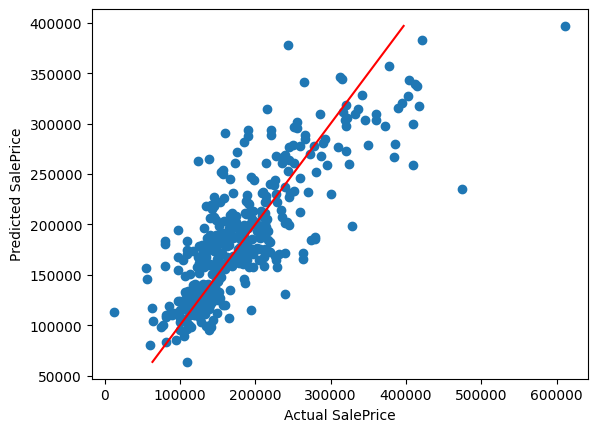

In [268]:
# See how well our model performs on our test data
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

In [269]:
list(zip(y_test,y_pred))[:10]

[(227000, np.float64(229750.44583255227)),
 (287500, np.float64(267482.2125727496)),
 (214000, np.float64(197396.26388071573)),
 (151000, np.float64(144114.203082287)),
 (187500, np.float64(195021.88558903997)),
 (154000, np.float64(160047.49129016596)),
 (152500, np.float64(158215.63630933187)),
 (185000, np.float64(190540.97774618783)),
 (194201, np.float64(247001.77529069775)),
 (188500, np.float64(228869.7168957478))]

In [294]:
mean_squared_error?

In [293]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred)**0.5
print(f"RMSE: {rmse}")

RMSE: 46192.611023521225


In [272]:
cross_val_score?

A note on Model Validation. You can see all of the types of metrics that can be calculated in cross_val_score [here](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [273]:
# Use cross validation to assess model performance
results = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 50120.571379295165


#### Repeat, but this time scale the features using the StandardScaler ( Z-score ).

In [274]:
# scale the features using the StandardScaler ( Z-score )
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=4)

In [275]:
X

,Garage Cars,Total Bsmt SF,Lot Frontage,Mas Vnr Area
0,2.0,1005.0,62.0,0.0
1,2.0,0.0,72.0,0.0
2,1.0,780.0,50.0,0.0
3,2.0,975.0,68.0,0.0
4,2.0,560.0,60.0,0.0
...,...,...,...,...
2632,2.0,816.0,52.0,0.0
2633,2.0,1054.0,74.0,0.0
2634,2.0,1226.0,61.0,0.0
2635,2.0,1064.0,78.0,174.0


In [276]:
X_scaled

array([[ 0.21384209, -0.12750291, -0.32533078, -0.57058005],
       [ 0.21384209, -2.42859974,  0.10206662, -0.57058005],
       [-1.28526473, -0.64267384, -0.83820767, -0.57058005],
       ...,
       [ 0.21384209,  0.37850943, -0.36807052, -0.57058005],
       [ 0.21384209,  0.00758636,  0.35850506,  0.37539576],
       [ 0.21384209, -0.05423415, -1.22286533, -0.57058005]])

In [277]:
pd.DataFrame(X_scaled).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,2033.0,1.869849e-16,1.000246,-1.285265,-1.285265,0.213842,0.213842,4.711163
1,2033.0,-1.712572e-16,1.000246,-2.428600,-0.615198,-0.159558,0.577709,11.561153
2,2033.0,2.865937e-16,1.000246,-2.077660,-0.453550,-0.026153,0.443985,10.402344
3,2033.0,3.582422e-17,1.000246,-0.570580,-0.570580,-0.570580,0.348213,8.128048


In [278]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

(
myfit2.intercept_,
myfit2.coef_
)


(np.float64(184652.6841687506),
 array([32426.72806932, 28573.55165491,  3716.54370289, 19350.27032797]))

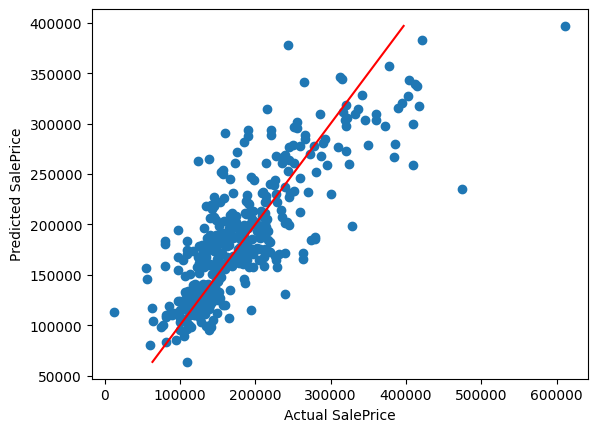

In [279]:
# See how well our model performs on our test data
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice') ;

In [280]:
list(zip(y_test,y_pred))[:10]

[(227000, np.float64(229750.44583255233)),
 (287500, np.float64(267482.2125727497)),
 (214000, np.float64(197396.26388071576)),
 (151000, np.float64(144114.203082287)),
 (187500, np.float64(195021.88558904003)),
 (154000, np.float64(160047.49129016596)),
 (152500, np.float64(158215.63630933187)),
 (185000, np.float64(190540.97774618785)),
 (194201, np.float64(247001.7752906979)),
 (188500, np.float64(228869.71689574787))]

In [281]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred)**0.5
print(f"RMSE: {rmse}")

RMSE: 46192.611023521225


In [282]:
# Use cross validation to assess model performance - scaled
results = cross_val_score(model, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 50120.57137929516


## Residual Analysis

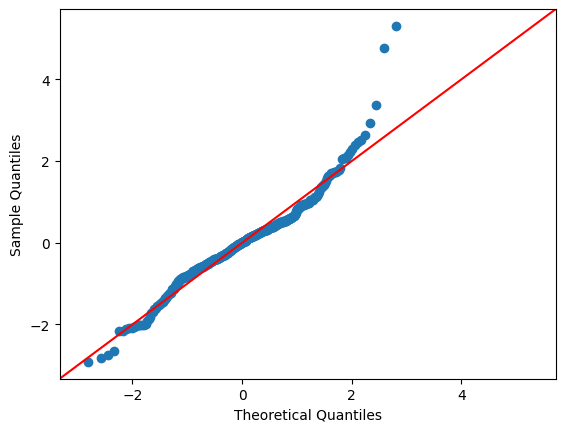

In [283]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

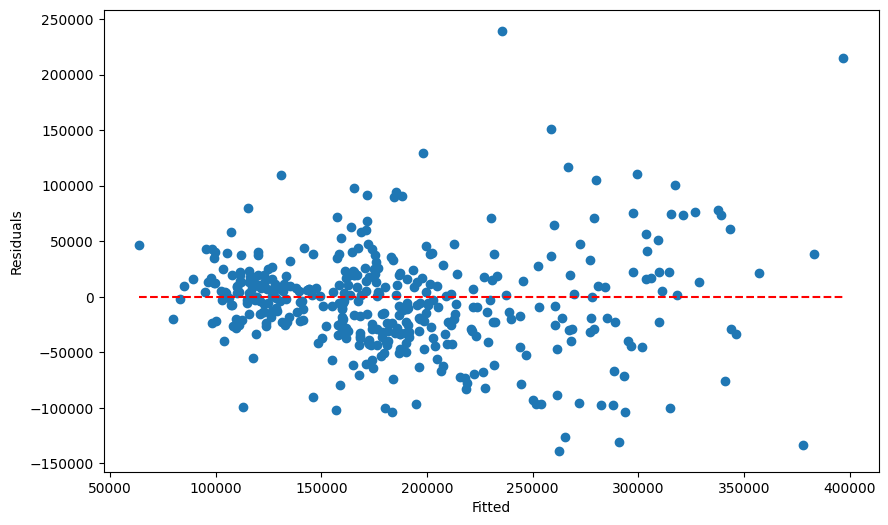

In [284]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

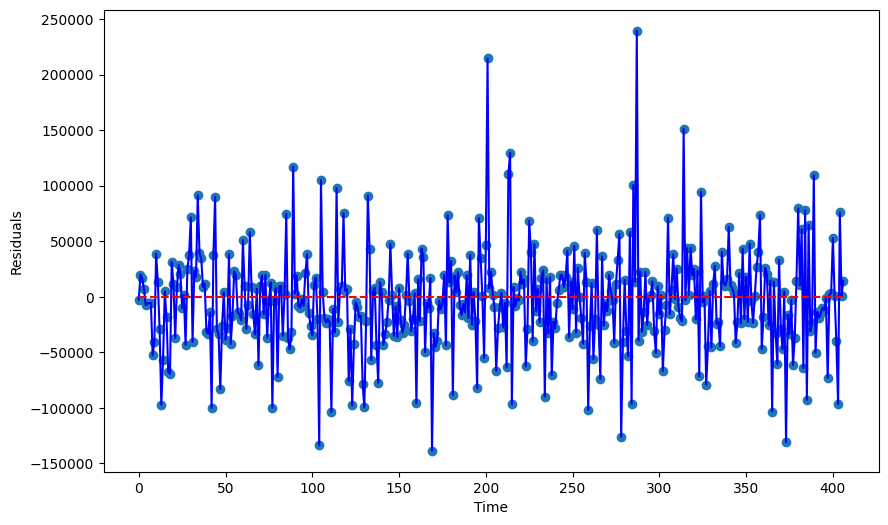

In [285]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

**Assumption 5 Independent Residuals**
There is a pattern so the error terms may be correlated. Further analysis is recommended.

## Data Visualization/Communication of Results
